# Data Visualiztion Course Final Projet
> by Kfir Goldfarb

<a href="https://github.com/kggold4"><img src="images/github.png" width="25px" height="25px" align="left"></a>
<a href="https://www.linkedin.com/in/kfir-goldfarb/"><img src="images/in.png"  width="25px" height="25px" align="left"></a>
<a href="mailto:kfir.goldfarb@msmail.ariel.ac.il"><img src="images/email.png" width="25px" height="25px" align="left"></a>
<a href="https://www.youtube.com/channel/UCypEWlruyG_I5A48GqB5c6g"><img src="images/youtube.png" width="25px" height="25px" align="left"></a>
<a href="https://www.hackerrank.com/kggold4?hr_r=1"><img src="images/hackerrank.png" width="25px" height="25px" align="left"></a>
<a href="https://stackoverflow.com/users/14749277/kfir-goldfarb"><img src="images/stackoverflow.png" width="25px" height="25px" align="left"></a>


<br>

# Jupyter Notebook Number 2
<i>Dimensionality Reduction and PCA for Fashion MNIST</i>

In [91]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import warnings
warnings.filterwarnings('ignore')

# sklearn tools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# basic models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

# ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [106]:
# import data:

# trains data
# mnist_train = pd.read_csv("data/task_2/fashion-mnist_train.csv")
# mnist_train = mnist_train.dropna()
# X_train = mnist_train.iloc[:, 1:].values
# y_train = mnist_train.iloc[:,0].values

# # test data
# mnist_test = pd.read_csv("data/task_2/fashion-mnist_test.csv")
# mnist_test = mnist_test.dropna()

# X_test = mnist_test.iloc[:,1:].values
# y_test = mnist_test.iloc[:,0].values



# merge the two training and test files together and create my own training and test splits
mnist_train = pd.read_csv("data/task_2/fashion-mnist_train.csv")
mnist_test = pd.read_csv("data/task_2/fashion-mnist_test.csv")

ds = mnist_train.append(mnist_test)

X = ds.iloc[:,1:]
y = ds.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3)

In [107]:
# first five test mnist:
# we can see that each row has 785 features
mnist_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
# function that print the accuracy
def print_accuracy(clf, X_train, X_test, y_train, y_test):
    # fit the train data to the model
    clf.fit(X_train, y_train)

    # get the pridictions of X_test
    pridictions = clf.predict(X_test)

    # get the accuracy of the model
    accuracy = clf.score(X_test, y_test)

    # print the accuracy
    print('accuracy of the model is: {} %'.format("%.2f" % (accuracy * 100)))

In [109]:
# function of ploting the confusion_matrix
def my_plot_confusion_matrix(clf, X_test, y_test):

    # get the confusion_matrix for ploting
    matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)

    # main title
    matrix.ax_.set_title('Confusion matrix')

    # x label
    plt.xlabel('Predicted Label')

    # y label
    plt.ylabel('True label')

    # size of the figure
    plt.gcf().set_size_inches(10, 6)

    # show plot
    plt.show()

In [110]:
# first five train mnist:
# we can see that each row has 785 features
mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
# seeing the mnist data widely
# we can see we have 10000 rows
mnist_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


# 154 Component PCA:

In [112]:
pca_components = PCA(n_components=154)
X_transformed_train = pca_components.fit(X_train).transform(X_train)
X_transformed_test = pca_components.fit(X_test).transform(X_test)
print("shape of 2 component PCA train data is:", X_transformed_train.shape)
print("shape of 2 component PCA test data is:", X_transformed_test.shape)

shape of 2 component PCA train data is: (52500, 154)
shape of 2 component PCA test data is: (17500, 154)


In [113]:
pca_components.explained_variance_ratio_

array([0.28927104, 0.17796451, 0.06091757, 0.0494533 , 0.03881816,
       0.03503784, 0.02345711, 0.01865117, 0.01346906, 0.01320967,
       0.01007809, 0.0091226 , 0.00762562, 0.0066727 , 0.00610762,
       0.00582241, 0.0054484 , 0.00539187, 0.00466936, 0.00453687,
       0.00433259, 0.00403816, 0.00383634, 0.00372018, 0.00369098,
       0.00344518, 0.00330032, 0.00317123, 0.00313389, 0.0029902 ,
       0.00278846, 0.00265919, 0.00263243, 0.00257068, 0.00245777,
       0.00240626, 0.00231229, 0.00223463, 0.00219572, 0.00209806,
       0.0020084 , 0.00197365, 0.00194226, 0.00181049, 0.00175646,
       0.00169941, 0.0016598 , 0.00163423, 0.0016168 , 0.00155485,
       0.00152945, 0.00150241, 0.00146561, 0.00143926, 0.00139333,
       0.00137367, 0.00131608, 0.00128201, 0.00126622, 0.00125636,
       0.00121738, 0.00119412, 0.00117533, 0.0011605 , 0.00115231,
       0.00112974, 0.00111376, 0.00108546, 0.00107086, 0.00104902,
       0.00103334, 0.00101968, 0.00098583, 0.00095171, 0.00094

In [114]:
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=35)
kmeans.fit(X_transformed_train)
print("score:", kmeans.score(X_transformed_train))

score: -169459249256.14108


In [85]:
len(X_transformed_train)

60000

In [71]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

# print accuracy
print_accuracy(bagging_clf, X_transformed_train, X_transformed_test, y_train, y_test)

KeyboardInterrupt: 

In [ ]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(bagging_clf, X_transformed_test, y_test)

In [41]:
pasting_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1)

# print accuracy
print_accuracy(pasting_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 61.52 %


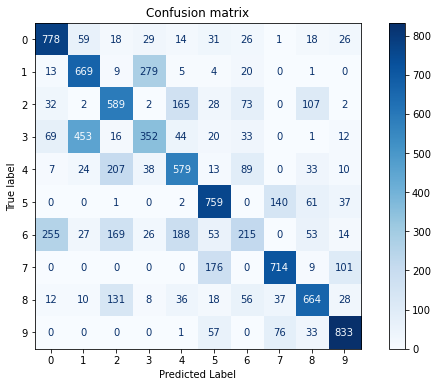

In [42]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(pasting_clf, X_transformed_test, y_test)

In [115]:
rnd_clf = RandomForestClassifier(
    n_estimators=100,
    max_features=5,
    max_depth=16,
    n_jobs=-1)

# print accuracy
print_accuracy(rnd_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 71.75 %


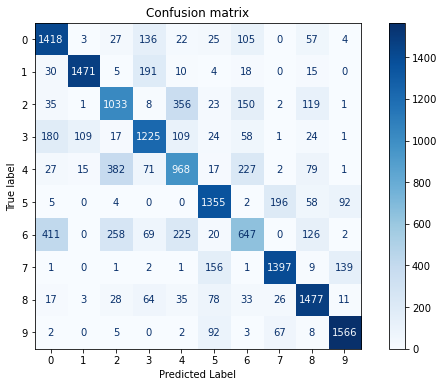

In [116]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(rnd_clf, X_transformed_test, y_test)

In [45]:
adaboost_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5)

# print accuracy
print_accuracy(adaboost_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 50.25 %


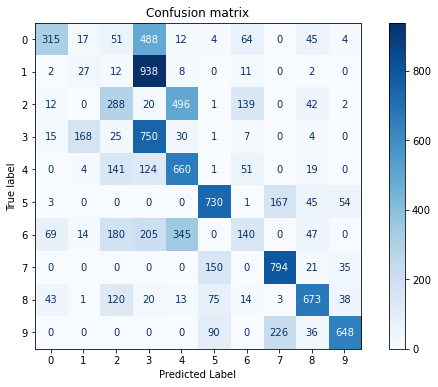

In [46]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(adaboost_clf, X_transformed_test, y_test)

In [50]:
grboost_clf = GradientBoostingClassifier(
    max_depth=2,
    n_estimators=200,
    learning_rate=0.5)

# print accuracy
print_accuracy(grboost_clf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 20.21 %


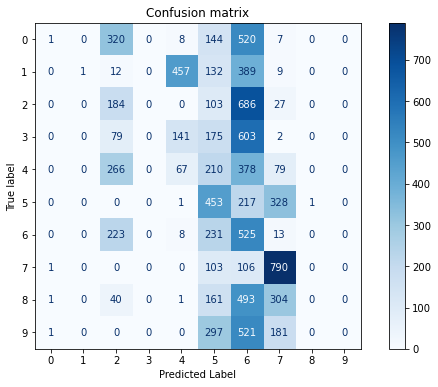

In [51]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(grboost_clf, X_transformed_test, y_test)

In [52]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# print accuracy
print_accuracy(xgb_model, X_transformed_train, X_transformed_test, y_train, y_test)

[11:14:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model is: 52.31 %


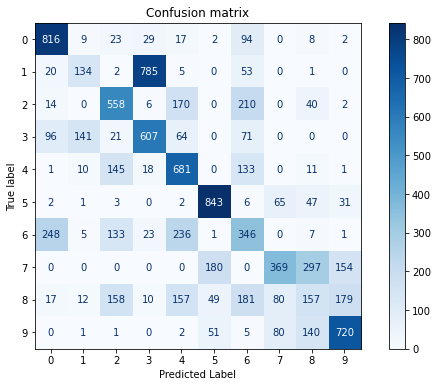

In [53]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(xgb_model, X_transformed_test, y_test)

In [56]:
# get the classifier (found that 5 neighbors is the best predicter)
nclf = KNeighborsClassifier(n_neighbors=5)

# print accuracy
print_accuracy(nclf, X_transformed_train, X_transformed_test, y_train, y_test)

accuracy of the model is: 51.19 %


In [74]:
logistic_regression = LogisticRegression()
grid_clf = GridSearchCV(
    estimator=logistic_regression,
    param_grid=parameters,
    scoring = 'accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2)
grid_scores = grid_search.fit(X_transformed_train , y_train)

TypeError: __init__() missing 1 required positional argument: 'param_grid'

In [ ]:
rf = RandomForestClassifier().fit(X_transformed_train,y_train)


param_values = {'n_estimators' : [10,50,100], 'max_features' : [5,10,20]}
gs = GridSearchCV(rf,param_grid = param_values, cv = 5,scoring = 'accuracy')

gs.fit(X_transformed_test,y_test)

In [ ]:
print(gs.best_score_,gs.best_params_)